In [7]:
%run ../ImportsConstantsSparkInit.ipynb
sc.setJobGroup("PLT_Years", "PLT_Years")

In [8]:
pipeline = "[{$set:{'Year':{$toString:'$Year'}}}{$sort:{'Year':1}}]"
df = spark.read.format("mongo").option("collection", "AccidentCountByYear").option("pipeline", pipeline).load()
df.printSchema()

root
 |-- AccidentCount: long (nullable = true)
 |-- Year: string (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



In [9]:
df.show()
df = df.toPandas()

+-------------+----+--------------------+
|AccidentCount|Year|                 _id|
+-------------+----+--------------------+
|       121994|2016|[646001f8d32ca37c...|
|       163913|2017|[646001f8d32ca37c...|
|       163114|2018|[646001f8d32ca37c...|
|       258526|2019|[646001f8d32ca37c...|
|       624592|2020|[646001f8d32ca37c...|
|      1512292|2021|[646001f8d32ca37c...|
|          911|2022|[646001f8d32ca37c...|
+-------------+----+--------------------+



In [10]:
df = df.set_index('Year')
display(df)

,AccidentCount,_id
Year,,
2016,121994,"(646001f8d32ca37c8757e112,)"
2017,163913,"(646001f8d32ca37c8757e111,)"
2018,163114,"(646001f8d32ca37c8757e114,)"
2019,258526,"(646001f8d32ca37c8757e113,)"
2020,624592,"(646001f8d32ca37c8757e117,)"
2021,1512292,"(646001f8d32ca37c8757e115,)"
2022,911,"(646001f8d32ca37c8757e116,)"


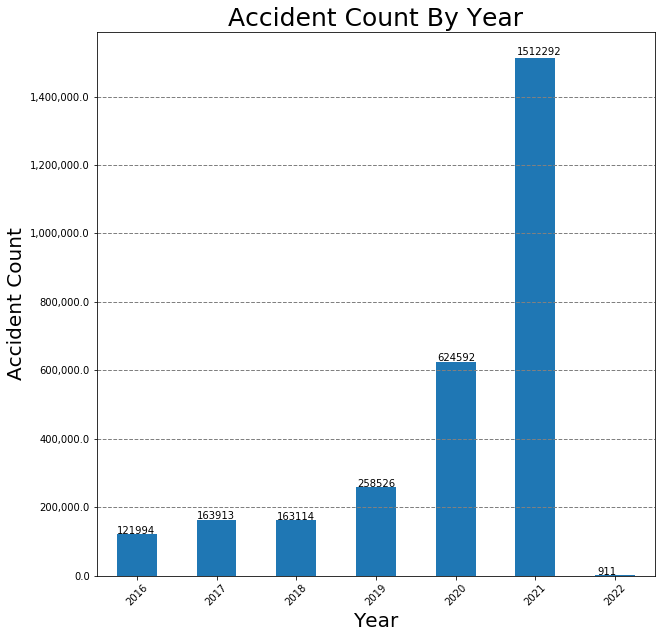

In [12]:
ax = df.plot.bar(rot=45, legend=False, figsize=(10,10))
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Accident Count", fontsize=20)
ax.set_title("Accident Count By Year", fontsize = 25)
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis='y')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))